In [11]:
#loadin the dataset
import pandas as pd
de=pd.read_csv("/content/crime.csv")
print(de)
#displayin info of the dataset
print("Information about the dataset")
print(de.info())


    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

In [ ]:
#checkin for data types
print("datatypes of every column")
print(de.dtypes)

ViolentCrime          object
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime         object
Burglary              object
Theft                 object
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

the two datatypes present are object and float

# New Section

there are 378 rows and 11 columns

In [ ]:
#checking for duplicates
print("checkin for any duplicates")
de.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
373    False
374    False
375    False
376    False
377    False
Length: 378, dtype: bool

There are no duplication  

In [ ]:
#checkin for any empty fields
print("Number of empty fields in each column")
print(de.isnull().sum())
print("Number of empty fields in the whole dataset")
print(de.isnull().sum().sum())



Number of empty fields in each column
ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64
Number of empty fields in the whole dataset
20


In [ ]:
def

In [23]:
import numpy as np

# take de as the original dataset and copying to a new dataset
de_clean = de.copy()

# Input missing values for numerical columns using the mean
numerical_cols = de_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    de_clean[col] = de_clean[col].fillna(de_clean[col].mean())

# Input missing values for categorical columns using the mode
categorical_cols = de_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = de_clean[col].mode()[0]
    de_clean[col] = de_clean[col].replace('', np.nan).fillna(mode_val)

# Print the clean dataset
print(de_clean)

    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

In [15]:
#checkin for missin marks in the new dataset

print("Number of missin fields in each column")
print(de_clean.isnull().sum())
print("Number of missin fields in the dataset")
print(de_clean.isnull().sum().sum())


Number of missin fields in each column
ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64
Number of missin fields in the dataset
0


In [ ]:
#summary of the dataset
print("Summary of the dataset ")
print(de_clean.describe())

Summary of the dataset 
           Murder        Rape     Robbery  AggravatedAssault  \
count  378.000000  378.000000  378.000000         378.000000   
mean     4.574868   41.306614   77.702646         241.319098   
std      3.383652   19.506386   53.977181         137.085053   
min      0.000000    2.700000    2.300000          25.500000   
25%      2.200000   29.000000   36.625000         144.300000   
50%      3.800000   37.550000   67.350000         217.000000   
75%      6.275000   51.550000  106.050000         304.850000   
max     20.600000  165.600000  351.900000         981.300000   

       MotorVehicleTheft  
count         378.000000  
mean          191.081746  
std           134.532918  
min            15.700000  
25%            97.550000  
50%           154.450000  
75%           249.650000  
max           718.600000  


In [26]:
numerical_columns=de_clean.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['Murder', 'Rape', 'Robbery', 'AggravatedAssault', 'MotorVehicleTheft'], dtype='object')

In [27]:
outliers = de[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()

print("\nOutliers:")
print(outliers)


Outliers:
Murder               7
Rape                 5
Robbery              7
AggravatedAssault    5
MotorVehicleTheft    7
dtype: int64


In [29]:
 #Define the z-score threshold for outlier detection
threshold = 3

# Calculate z-scores for each numerical column
z_scores = de[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any z-score exceeds the threshold
outlier_rows = z_scores[(z_scores.abs() > threshold).any(axis=1)]
outlier_rows

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
4,0.450736,1.153129,2.389850,2.001067,3.611148
5,-0.022126,-0.297678,0.785468,3.897368,0.922586
9,1.071367,6.371933,2.249050,3.098197,1.461488
18,0.805382,-0.466853,0.972584,1.058380,3.068530
23,-0.465434,3.213993,-0.311292,1.093348,-0.724594
84,-1.352050,4.106009,0.833637,2.148225,-0.451798
94,4.351846,0.814779,3.136462,2.452012,2.041272
184,0.687166,1.127497,3.618147,1.679067,1.922342
211,2.046644,0.563579,3.375451,3.444966,0.567283
220,1.544229,-0.241286,3.484757,0.922149,2.589093



Unique Values in Categorical Columns:
ViolentCrime: 368 unique values
ViolentCrime
180.4    3
579.7    2
388.5    2
324.1    2
323.7    2
        ..
188.8    1
582.9    1
532.3    1
537.3    1
262      1
Name: count, Length: 368, dtype: int64

PropertyCrime: 369 unique values
PropertyCrime
2,817.80    8
3,019.10    2
3,285.80    2
3,609.00    1
2,252.40    1
           ..
3,998.70    1
3,439.40    1
2,328.30    1
3,377.00    1
1,281.20    1
Name: count, Length: 369, dtype: int64

Burglary: 365 unique values
Burglary
188.1    6
497.1    2
325.4    2
465.8    2
534.9    2
        ..
373.5    1
473.6    1
878.5    1
751.3    1
281.8    1
Name: count, Length: 365, dtype: int64

Theft: 369 unique values
Theft
1,631.70    6
2,113.20    2
2,476.10    2
1,520.20    2
2,096.80    2
           ..
1,699.30    1
1,655.60    1
2,337.70    1
705.7       1
835         1
Name: count, Length: 369, dtype: int64

State: 58 unique values
State
CA                                              31
TX        

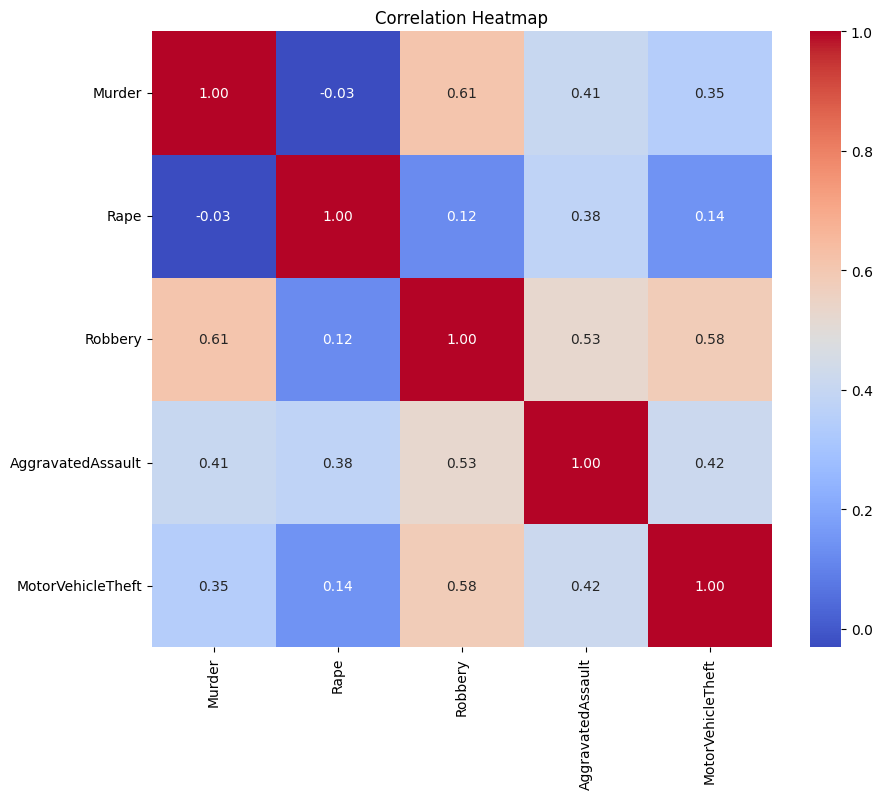

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in de_clean.select_dtypes(include='object').columns:
    print(f"{col}: {de_clean[col].nunique()} unique values")
    print(de_clean[col].value_counts())
    print()

# Correlation matrix for numerical columns
print("\nCorrelation Matrix for Numerical Columns:")
corr_matrix = de_clean.select_dtypes(include=np.number).corr()
print(corr_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

